<a href="https://colab.research.google.com/github/bukhanka/digbreakhack_23-26_iishnica/blob/main/gigachat_final_solution(24_11).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langchain
!pip install gigachat

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.8/46.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

# Функция для очистки текста от HTML-тегов
def clean_html(text):
    return BeautifulSoup(text, "html.parser").get_text()

# Функция для чтения и предварительной обработки датасета
def read_and_preprocess_dataset(file_path):
    dataset = pd.read_csv(file_path, sep=';')
    # combined_column = dataset.iloc[:, 2:].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
    # dataset['combined'] = combined_column
    # dataset['combined'] = dataset['combined'].apply(clean_html)
    return dataset

# Функция для определения самых популярных классов
def get_most_popular_classes(dataset, n):
    class_counts = dataset['Группа тем'].value_counts()
    return class_counts.head(n).index.tolist()

# Функция для создания подвыборки с самыми популярными классами
def create_subsample(dataset, popular_classes, k):
    subsample = pd.DataFrame()
    for cls in popular_classes:
        subsample = subsample.append(dataset[dataset['Группа тем'] == cls].sample(min(k, len(dataset[dataset['Группа тем'] == cls]))))
    return subsample

file_path = 'train_dataset_train.csv'
dataset = read_and_preprocess_dataset(file_path)
n = 10  # Количество самых популярных классов
k = 2  # Количество примеров каждого класса
sampled_classes = get_most_popular_classes(dataset, n)
subsample = create_subsample(dataset, sampled_classes, k)
subsample


<ipython-input-50-205401abdb82>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subsample = subsample.append(dataset[dataset['Группа тем'] == cls].sample(min(k, len(dataset[dataset['Группа тем'] == cls]))))
<ipython-input-50-205401abdb82>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subsample = subsample.append(dataset[dataset['Группа тем'] == cls].sample(min(k, len(dataset[dataset['Группа тем'] == cls]))))
<ipython-input-50-205401abdb82>:26: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subsample = subsample.append(dataset[dataset['Группа тем'] == cls].sample(min(k, len(dataset[dataset['Группа тем'] == cls]))))
<ipython-input-50-205401abdb82>:26: FutureWarning: The frame.append method is deprecated and will be remov

,Исполнитель,Группа тем,Текст инцидента,Тема
8587,Министерство здравоохранения,Здравоохранение/Медицина,'Здравствуйте у меня жена была в положений 19 ...,Отсутствие лекарств в стационарах
18996,Министерство здравоохранения,Здравоохранение/Медицина,'Скажите пожалуйста на этой неделе будет обнов...,Льготные лекарства
10505,Министерство социального развития ПК,Социальное обслуживание и защита,"'Здравствуйте , отправила документы в отдел су...",Оказание гос. соц. помощи
13389,Министерство социального развития ПК,Социальное обслуживание и защита,"'Я не поняла, а если пособие уже назначено сро...",Дети и многодетные семьи
22586,Город Пермь,Дороги,'По улице Чердынской между домами 32-34. Без и...,★ Нарушение правил очистки дорог от снега и на...
2618,Город Пермь,Дороги,"'Ул. КУЙБЫШЕВА, качество уборки снега оставляе...",★ Нарушение правил очистки дорог от снега и на...
12629,ИГЖН ПК,ЖКХ,"'У нас на Каляева, всё лето почти воды нет.......",Отсутствие холодной воды
4685,ИГЖН ПК,ЖКХ,'Здравствуйте!,Отсутствие горячей воды
9687,Лысьвенский городской округ,Благоустройство,'Здравствуйте! Почему нужно обращаться в Админ...,Благоустройство общественного пространства (па...
7196,Город Пермь,Благоустройство,'Только на ул.Старцева площадку ни в коем случ...,Уборка территорий


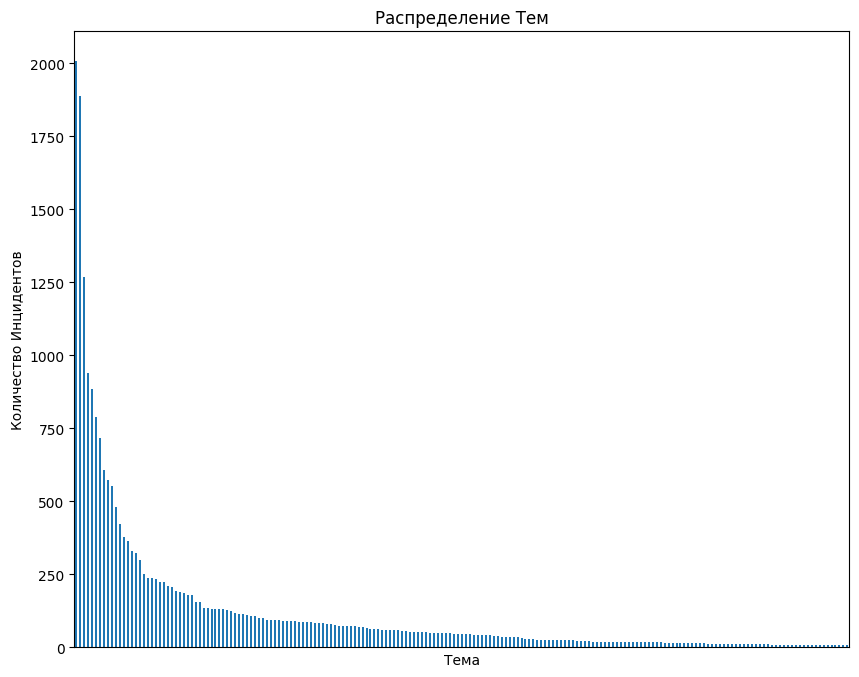

In [ ]:
import matplotlib.pyplot as plt

# Получение количества инцидентов по каждой теме
theme_counts = dataset['Тема'].value_counts()

# Визуализация распределения тем
plt.figure(figsize=(10, 8))
theme_counts.plot(kind='bar')
plt.title('Распределение Тем')
plt.xlabel('Тема')
plt.ylabel('Количество Инцидентов')
plt.xticks([])  # Удаление названий тем для читаемости
plt.show()

In [ ]:
top_10_popular_themes = theme_counts.head(10)

# Получение топ 10 непопулярных тем
top_10_unpopular_themes = theme_counts.tail(10)

top_10_popular_themes, top_10_unpopular_themes

(Дети и многодетные семьи                                                                                           2008
 Оказание гос. соц. помощи                                                                                          1886
 ★ Нарушение правил очистки дорог от снега и наледи/Обращения о необходимости очистить тротуар от снега и наледи    1269
 Технические проблемы с записью на прием к врачу                                                                     941
 ★ Оказание медицинской помощи не в полном объеме/отказ в оказании медицинской помощи                                885
 Плата за вывоз ТКО                                                                                                  788
 Ремонт дороги                                                                                                       718
 Нехватка или сокращение врачей и медицинских учреждений                                                             608
 Жалобы на управляющие компании 

In [ ]:
from langchain.schema import HumanMessage, SystemMessage
from langchain.chat_models.gigachat import GigaChat

# Функция для создания запроса классификации для GigaChat
def create_classification_prompt(text, sampled_classes):
    prompt = "Определите категорию из возможных категорий для следующего текста:"
    prompt += f"Текст: {text}. Возможные категории (назови только категорию и сторого так как она тут написана): {'; '.join(sampled_classes)}"
    return prompt

# Функция для классификации текста
def classify_text(chat, text, sampled_classes):
    prompt = create_classification_prompt(text, sampled_classes)
    messages = [SystemMessage(content=prompt)]
    response = chat(messages)
    predicted_class = response.content.strip().split(": ")[-1]
    return predicted_class

# Инициализация GigaChat
chat = GigaChat(credentials='MTNkNjQ0MWEtNDkwZC00MTVlLTlmNmYtNjUwMGFlYjE0MGFiOmYwNzQ5YjM3LTNhNzgtNGYyYy1iZGFlLWIzOWI5MGZlNTFhOQ==', verify_ssl_certs=False)


In [ ]:
# Функция для классификации текстов из подвыборки
def classify_texts_in_subsample(subsample, chat, sampled_classes):
    results = []
    for index, row in subsample.iterrows():
        text = row['Текст инцидента']
        real_class = row['Группа тем']
        predicted_class = classify_text(chat, text, sampled_classes)
        results.append((real_class, predicted_class))
    return results

# Классификация текстов из подвыборки
classification_results = classify_texts_in_subsample(subsample, chat, sampled_classes)

In [ ]:
from sklearn.metrics import accuracy_score

# Функция для расчета точности
def calculate_accuracy(classification_results):
    true_labels, predicted_labels = zip(*classification_results)
    accuracy = accuracy_score(true_labels, predicted_labels)
    return accuracy

# Расчет точности
accuracy = calculate_accuracy(classification_results)
print(f"Точность классификации: {accuracy}")

Точность классификации: 0.4


In [ ]:
import string

# Функция для очистки и нормализации текста
def normalize_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.replace(" ", "")
    return text

# Измененная функция для расчета точности с учетом нормализации текста
def calculate_accuracy_normalized(classification_results):
    normalized_results = [(normalize_text(real), normalize_text(predicted)) for real, predicted in classification_results]
    true_labels, predicted_labels = zip(*normalized_results)
    accuracy = accuracy_score(true_labels, predicted_labels)
    return accuracy

# Расчет точности с нормализованными классами
accuracy_normalized = calculate_accuracy_normalized(classification_results)
print(f"Нормализованная точность классификации: {accuracy_normalized}")


Нормализованная точность классификации: 0.6


In [ ]:
# Функция для вывода реальных и предсказанных классов
def display_classification_results(classification_results):
    for real_class, predicted_class in classification_results:
        if normalize_text(real_class) != normalize_text(predicted_class): print(f"Реальный класс: {real_class}, Предсказанный класс: {predicted_class}")

# Отображение реальных и предсказанных классов
display_classification_results(classification_results)


Реальный класс: Здравоохранение/Медицина, Предсказанный класс: Медицина
Реальный класс: ЖКХ, Предсказанный класс: Здравоохранение/Медицина.
Реальный класс: Благоустройство, Предсказанный класс: Свалки/ТКО
Реальный класс: Мусор/Свалки/ТКО, Предсказанный класс: ЖКХ
Реальный класс: Мусор/Свалки/ТКО, Предсказанный класс: Социальное обслуживание и защита
Реальный класс: Коронавирус, Предсказанный класс: Здравоохранение/Медицина
Реальный класс: Коронавирус, Предсказанный класс: Здравоохранение/Медицина
Реальный класс: Безопасность, Предсказанный класс: Социальное обслуживание и защита


In [ ]:
unique_groups = subsample['Группа тем'].nunique()
unique_groups

26